# ANLY-590 Homework 1

### Hanjing Wang

### Question 1

##### (a)

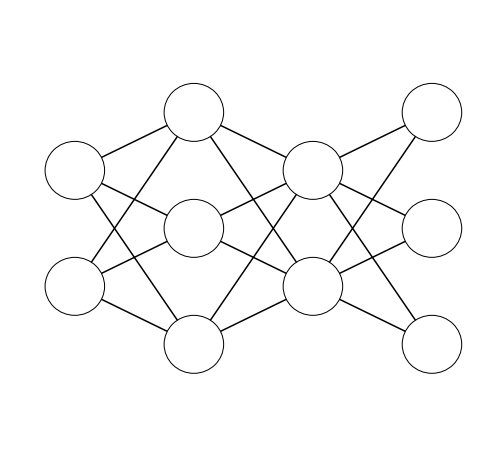

In [7]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

                
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, 0.1, .9, 0.1, .9, [2, 3,2, 3])
plt.show()
plt.close()

##### (b)

Suppose we have the following weight matrix and we also consider there are bias. If there is no bias, change the elements of the bias vector to 0.

\begin{equation}
W_1 = \begin{pmatrix} w_{11}^{1} & w_{12}^{1} \\  w_{21}^{1} & w_{22}^{1} \\ w_{31}^{1} & w_{32}^{1} \end{pmatrix}
\end{equation}

\begin{equation}
W_2 = \begin{pmatrix} w_{11}^{2} & w_{12}^{2} & w_{13}^{2}\\ w_{21}^{2} & w_{22}^{2} & w_{23}^{2} \end{pmatrix}
\end{equation}

\begin{equation}
V = \begin{pmatrix} v_{11} & v_{12} \\  v_{21} & v_{22} \\ v_{31} & v_{32} \end{pmatrix}
\end{equation}

\begin{equation}
b^{1} = [b_1, b_2, b_3]^T \\
b^{2} = [b_3, b_4]^T \\
c = [c_1,c_2,c_3 ]^T \\
\end{equation}

\begin{equation}
X = \begin{pmatrix} x_{11} \\ x_{21}  \end{pmatrix} \\
H_1 = \begin{pmatrix} H_{11}^1 \\ H_{21}^1 \\H_{31}^1 \end{pmatrix} \\
H_2 = \begin{pmatrix} H_{11}^2 \\ H_{21}^2\end{pmatrix} \\
Y = \begin{pmatrix} Y_{11} \\ Y_{21} \\Y_{31} \end{pmatrix} 
\end{equation}



So, the mathematical equation for this network in the form of matrix could be showed in the following

\begin{equation}
a_1  = W_1X+b^1\\
H_1 = ReLu(a_1)\\
a_2 = W_2H_1+b^2\\
H_2 = ReLu(a_2)\\
Y = softmax(VH_2+c)
\end{equation}

##### (c)

In [2]:
import numpy as np
def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

def ReLu(z):
    return np.maximum(0, z)

def ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c):
    a_1 = np.dot(w_1, x) + b_1
    h_1 = ReLu(a_1)
    a_2 = np.dot(w_2, h_1) + b_2
    h_2 = ReLu(a_2)
    y = np.dot(v, h_2) + c
    return softmax(y)

##### (d)

In [3]:
x = np.array([[1,0,0],[-1,-1,1]])
w_1 = np.array([[1,0],[-1,0],[0,0.5]])
w_2 = np.array([[1,0,0],[-1,-1,0]])
v = np.array([[1,1],[0,0],[-1,-1]])
b_1 = np.array([[0],[0],[1]])
b_2 = np.array([[1],[-1]])
c = np.array([[1],[0],[0]])

print(ff_nn_2_ReLu(x,w_1,w_2,v,b_1,b_2,c))


[[ 0.57611688  0.21194156  0.21194156]
 [ 0.33333333  0.33333333  0.33333333]
 [ 0.1553624   0.4223188   0.4223188 ]]


### Question 2

##### (a)

\begin{equation}
\frac{\partial f}{\partial x} = -2(1-x) - 400(y-x^2)x \\
\frac{\partial f}{\partial y} = 200(y-x^2)
\end{equation}

##### (b)

We chose x from -1 to 1 and y from 0 to 1 to draw the contour lines

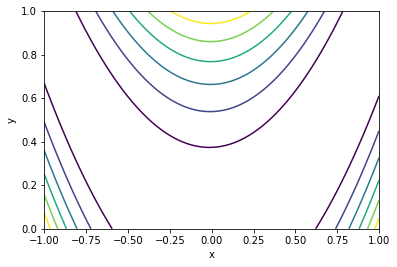

In [4]:
def f(x, y):
    return (1-x)**2 + 100*(y-x**2)**2
delta = 0.001
x = np.arange(-1, 1, delta)
y = np.arange(0,1, delta)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()
plt.close()

##### (c)

In [8]:
def grad_f(x):
    df_dx = -2*(1-x[0]) + 200*(x[1]-x[0]**2)*(-2*x[0]) 
    df_dy = 200*(x[1]-x[0]**2)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=0.001):
    if starting_point:
        point = starting_point
    else:
        x = np.random.uniform(-1,1,size=1)
        y = np.random.uniform(0,1,size=1)
        point = np.array([x,y])
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)


We try a list of learning rate [0.00001, 0.0001, 0.001, 0.002] with iterations equal to 10000

learning_rate= 1e-05 



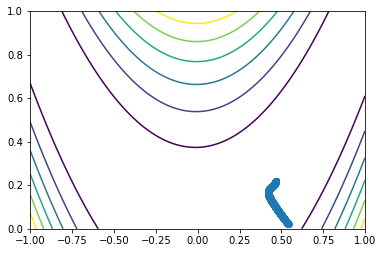

In [12]:
print('learning_rate=',0.00001, '\n')
np.random.seed(10)
traj = grad_descent(iterations=10000, learning_rate = 0.00001)    
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()
plt.close()


learning_rate= 0.0001 



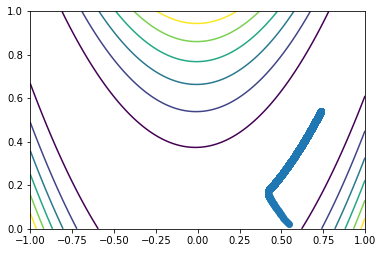

In [13]:
print('learning_rate=',0.0001, '\n')
np.random.seed(10)
traj = grad_descent(iterations=10000, learning_rate = 0.0001)    
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()
plt.close()

learning_rate= 0.001 



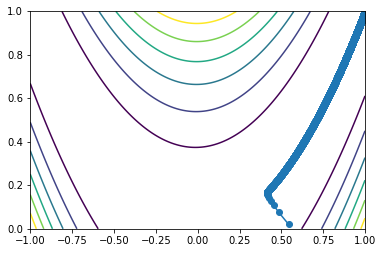

In [14]:
print('learning_rate=',0.001, '\n')
np.random.seed(10)
traj = grad_descent(iterations=10000, learning_rate = 0.001)    
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()
plt.close()

learning_rate= 0.002 



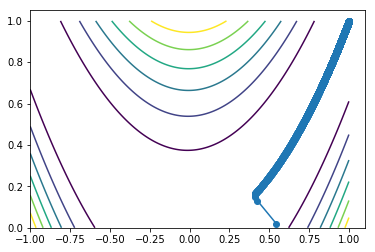

In [15]:
print('learning_rate=',0.002, '\n')
np.random.seed(10)
traj = grad_descent(iterations=10000, learning_rate = 0.002)    
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')
plt.show()
plt.close()

As we could see from the plots, since the minimum point is (1,1), as the learning rate become larger and larger, the points are faster to be close to the minimum point.

##### (d)

In [26]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=0.0001):
    if starting_point:
        point = starting_point
    else:
        x = np.random.uniform(-1,1,size=1)
        y = np.random.uniform(0,1,size=1)
        point = np.array([x,y])
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return trajectory

We could try a few different settings of the algorithm’s hyperparameters

First, we try alpha = 0.5, epsilon = 0.00001 with iterations = 10000

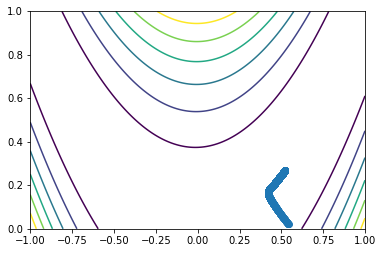

In [20]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=10000, epsilon=0.00001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= [traj[i][0][0] for i in range(len(traj))]
y= [traj[i][1][0] for i in range(len(traj))]
plt.plot(x,y,'-o')
plt.show()
plt.close()

Then, we try alpha = 0.8, epsilon = 0.00001 with iterations = 10000

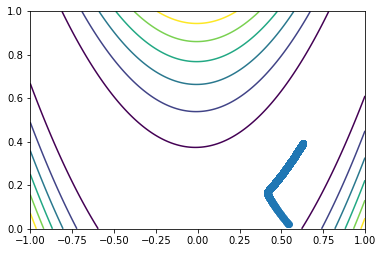

In [24]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=10000, epsilon=0.00001, alpha=0.8)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= [traj[i][0][0] for i in range(len(traj))]
y= [traj[i][1][0] for i in range(len(traj))]
plt.plot(x,y,'-o')
plt.show()
plt.close()

With alpha being larger, it seems that the algorithm learns faster. Then we could try alpha = 0.8, epsilon = 0.0001 with iterations = 10000

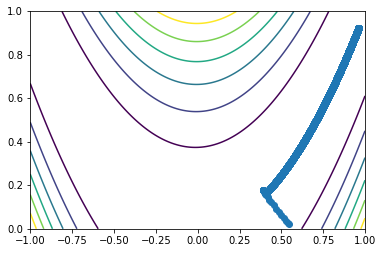

In [25]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=10000, epsilon=0.0001, alpha=0.8)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= [traj[i][0][0] for i in range(len(traj))]
y= [traj[i][1][0] for i in range(len(traj))]
plt.plot(x,y,'-o')
plt.show()
plt.close()

So, when we increase the epsilon, the algorithm learns faster.

# Question 3

##### (a)

With the definition of the parameters in question 1, we could compute the partial derivitives in the following. As we know, if we input a X with shape (2, n), then the shape of y, $\hat y, W_1, W_2, V, H_1, H_2, b^1, b^2, c, a_1, a_2, X$ are $(3,n), (3,n), (3,2), (2,3), (3,2), (3,n), (2,n), (3,1), (2,1), (3,1), (3,n), (2,n), (2,n)$, especially n =1

\begin{equation}
\frac{\partial L}{\partial c} = \hat y - y \\
\frac{\partial L}{\partial V} = (H_2(\hat y - y)^T)^T \\
\frac{\partial L}{\partial W_2} = ((\hat y - y)^T V)^T \odot Relu^{'}(a_2) H_1^T)^T = ((\hat y - y)^T V)^T \odot I_{H_2>0} H_1^T)^T \\
\frac{\partial L}{\partial b_2} = (\hat y - y)^T V)^T \odot Relu^{'}(a_2) = (\hat y - y)^T V)^T \odot I_{H_2>0}\\
\frac{\partial L}{\partial W_1} = (W_2^T((\hat y - y)^T V)^T \odot Relu^{'}(a_2))) \odot Relu^{'}(a_1) X^T = (W_2^T((\hat y - y)^T V)^T \odot I_{H_2>0})) \odot I_{H_1>0} X^T \\
\frac{\partial L}{\partial b_1} = (W_2^T((\hat y - y)^T V)^T \odot Relu^{'}(a_2))) \odot Relu^{'}(a_1) = (W_2^T((\hat y - y)^T V)^T \odot I_{H_2>0})) \odot I_{H_1>0}
\end{equation}

##### (b)

First we write two functions to transform the weight vectors to weight matrix with bias

In [28]:
def weight_matrix_to_vector(w_1, w_2, v, b_1, b_2, c):
    w1_11, w1_12, w1_21, w1_22, w1_31, w1_32 = w_1[0,0], w_1[0,1], w_1[1,0], w_1[1,1], w_1[2,0], w_1[2,1]
    b1_1, b1_2, b1_3 = np.squeeze(b_1[0]), np.squeeze(b_1[1]), np.squeeze(b_1[2]) 
    w2_11, w2_12, w2_13, w2_21, w2_22, w2_23 = w_2[0,0], w_2[0,1], w_2[0,2], w_2[1,0], w_2[1,1], w_2[1,2]
    b2_1, b2_2 = np.squeeze(b_2[0]), np.squeeze(b_2[1])
    v_11, v_12, v_21, v_22, v_31, v_32 = v[0,0], v[0,1], v[1,0], v[1,1], v[2,0], v[2,1]
    c_1, c_2, c_3 = np.squeeze(c[0]), np.squeeze(c[1]), np.squeeze(c[2])
    return np.array([w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, b1_1, b1_2, b1_3, w2_11, w2_12, w2_13, w2_21, w2_22, w2_23
                     ,b2_1, b2_2, v_11, v_12, v_21, v_22, v_31, v_32, c_1, c_2, c_3])

def weight_vector_to_matrix(param_vec):
    w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, b1_1, b1_2, b1_3, \
    w2_11, w2_12, w2_13, w2_21, w2_22, w2_23, b2_1, b2_2, \
    v_11, v_12, v_21, v_22, v_31, v_32, c_1, c_2, c_3 = param_vec
    w_1 = np.array([[w1_11, w1_12],[w1_21, w1_22], [w1_31, w1_32]])
    b_1 = np.array([[b1_1],[b1_2],[b1_3]])
    w_2 = np.array([[w2_11, w2_12, w2_13], [w2_21, w2_22, w2_23]])
    b_2 = np.array([[b2_1], [b2_2]])
    v = np.array([[v_11, v_12],[v_21, v_22], [v_31, v_32]])
    c = np.array([[c_1], [c_2], [c_3]])
    return ((w_1, w_2, v, b_1, b_2, c))

Then, we could write a function grad_f that takes in a weights vector and returns
the gradient of the Loss at that location.

In [59]:
def grad_f(weight_vector, x, y):
    x = x.T # x (2,n)
    w_1, w_2, v, b_1, b_2, c = weight_vector_to_matrix(weight_vector) 
    z_1 = np.dot(w_1, x) + b_1 #(3,n)
    h_1 = ReLu(z_1) #(3,n)
    z_2 = np.dot(w_2, h_1) + b_2 #(2,n)
    h_2 = ReLu(z_2) #(2,n)
    z_3 = np.dot(v, h_2) + c #(3,n)
    y_hat = softmax(z_3).T #(n, 3)
    
    dv = h_2.dot((y_hat-y)).T
    dc = (y_hat-y).sum(axis = 0).reshape(3,1)
    dw2 = (((y_hat-y).dot(v)).T * (h_2 > 0)).dot(h_1.T)
    db2 = (((y_hat - y).dot(v)).T * (h_2 > 0)).sum(axis=1).reshape(2,1)
    dw1 = ((w_2.T.dot(  (((y_hat-y).dot(v)).T * (h_2 > 0))  )) * (h_1 > 0)).dot(x.T)
    db1 = ((w_2.T.dot(  (((y_hat-y).dot(v)).T * (h_2 > 0))  )) * (h_1 > 0)).sum(axis = 1).reshape(3,1)
    
    derivitive_vector = weight_matrix_to_vector(dw1, dw2, dv, db1, db2, dc)    
    return np.array(derivitive_vector)


##### (c)

We then generate our data

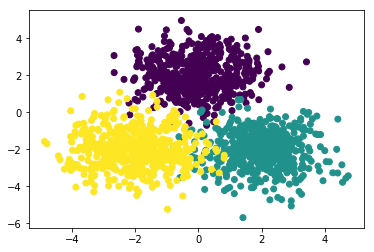

In [54]:
x = np.concatenate(
    (np.random.multivariate_normal(mean=[0,2],cov=[[1,0],[0,1]],size = 500),
    np.random.multivariate_normal(mean=[2,-2],cov=[[1,0],[0,1]],size = 500),
    np.random.multivariate_normal(mean=[-2,-2],cov=[[1,0],[0,1]],size = 500)))
class_ = np.zeros(1500)
class_[:500] = 0
class_[500:1000] = 1
class_[1000:] = 2

y = np.array([1,0,0]*500 + [0,1,0]*500 + [0,0,1]*500).reshape(1500,3)
plt.scatter(x[:,0], x[:,1], c=class_)
plt.show()
plt.close()

##### (d)

In [72]:
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()/len(y)

def ReLu(x):
    return np.maximum(x,0)

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=0))[np.newaxis,:]

def ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c):
    z_1 = np.dot(w_1, x) + b_1
    h_1 = ReLu(z_1)
    z_2 = np.dot(w_2, h_1) + b_2
    h_2 = ReLu(z_2)
    z_3 = np.dot(v, h_2) + c
    return softmax(z_3)

def grad_descent(x, y, iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=26)
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x.T, *weight_vector_to_matrix(point)).T)]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x.T, *weight_vector_to_matrix(point)).T))
    return (np.array(trajectory), losses)

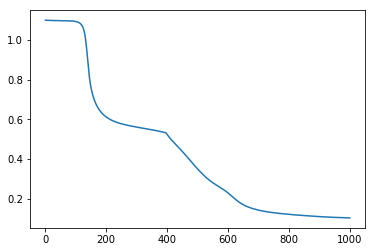

In [82]:
traj, losses = grad_descent(x, y, iterations=1000,learning_rate=0.0001)
plt.plot(losses)
plt.show()

We should also show the total loss in each iteration

In [76]:
for i in range(len(losses))[:10]:
    print('In iteration',i, 'the total loss is',losses[i])

In iteration 0 the total loss is 1.09923655382
In iteration 1 the total loss is 1.09918032545
In iteration 2 the total loss is 1.09912629674
In iteration 3 the total loss is 1.09907434694
In iteration 4 the total loss is 1.09902435146
In iteration 5 the total loss is 1.09897597221
In iteration 6 the total loss is 1.09892893208
In iteration 7 the total loss is 1.09888328239
In iteration 8 the total loss is 1.09883867642
In iteration 9 the total loss is 1.09879477201


##### (e)

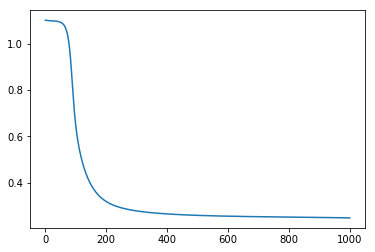

In [83]:
def grad_descent_with_momentum(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=1e-4):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=26)
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x.T, *weight_vector_to_matrix(point)).T)]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x.T, *weight_vector_to_matrix(point)).T))
    return (np.array(trajectory), losses)

traj, losses = grad_descent_with_momentum(x, y, iterations=1000,alpha=.5, epsilon = 0.0001)
plt.plot(losses)
plt.show()
plt.close()

In [84]:
for i in range(len(losses))[:10]:
    print('In iteration',i, 'the total loss is',losses[i])

In iteration 0 the total loss is 1.1002115925
In iteration 1 the total loss is 1.1000316225
In iteration 2 the total loss is 1.09978493633
In iteration 3 the total loss is 1.09953166897
In iteration 4 the total loss is 1.09929887653
In iteration 5 the total loss is 1.099095825
In iteration 6 the total loss is 1.09892315446
In iteration 7 the total loss is 1.09877780234
In iteration 8 the total loss is 1.09865552265
In iteration 9 the total loss is 1.09855203036


From the plot above, we could see that the gradiant decent using momentum converge more efficiently since the losses converge almost at 400 iterations for the method using the momentum while the losses converge at nearly 600 for the method without momentum. 